In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = df=pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.isnull().sum()

,0
id,0
age,0
sex,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [ ]:
# Add 'overweight' column
BMI=df['weight']/ (df['height']/100)**2
df['overweight'] = (BMI > 25).astype(int)

In [ ]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

In [ ]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


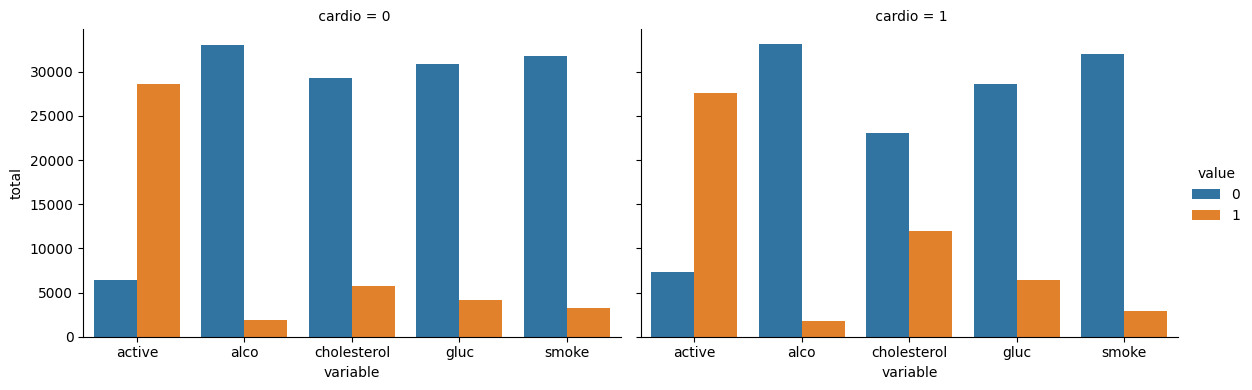

In [ ]:
def draw_cat_plot():
    df_cat = df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco','cholesterol', 'gluc', 'smoke'])
    fig = sns.catplot(x='variable', hue='value', col='cardio', data=df_cat, kind='count', height=4, aspect=1.5)
    fig.set_axis_labels('variable', 'total')
    fig.set_titles(" cardio = {col_name}")
    plt.show()
    return fig
draw_cat_plot()

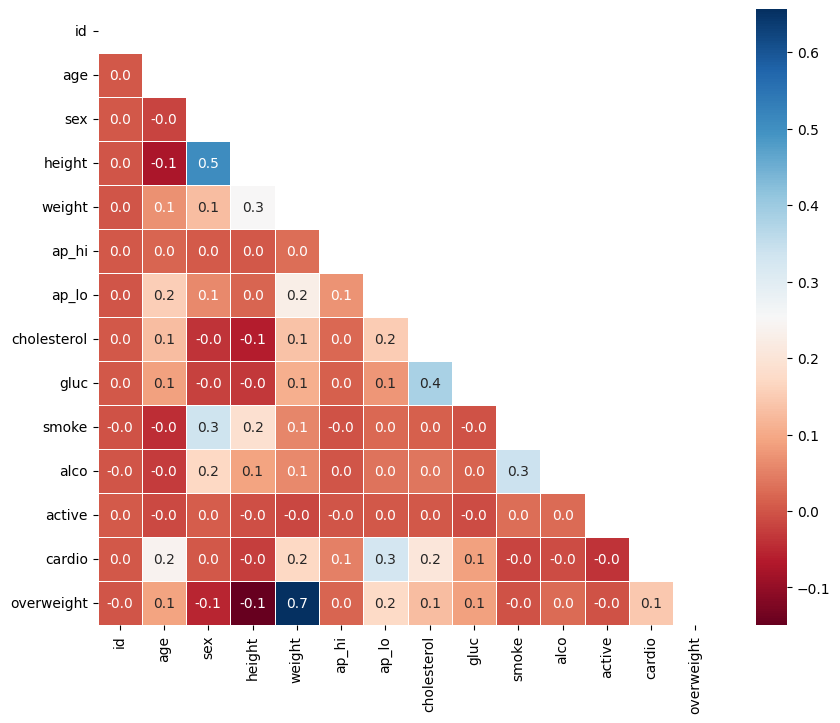

In [ ]:
def draw_heat_map():
    # Filter the dataframe
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) &
                 (df['weight'] <= df['weight'].quantile(0.975))]
    corr = df_heat.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr, mask=mask, cmap='RdBu', annot=True, fmt=".1f", linewidths=.7, ax=ax)
    plt.show()
draw_heat_map()